## ******************************LIBRARY IMPORTAION***************

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras.models import Sequential,Model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense,Flatten,Dropout,SimpleRNN,LSTM,Input,Reshape
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from miceforest import ImputationKernel
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

## ******DATA SET IMPORTATION AND PREPROCESSING FOR FIRST DATASET******

In [2]:
df_als=pd.read_csv('data/train2-alsfrs.csv')
df_sensor=pd.read_csv('data/train2-sensor.csv')
df_static=pd.read_csv('data/train2-static.csv')


In [3]:
df_als= df_als.rename(columns={'patient_id':'id','days_from_diagnosis': 'days'})
df_sensor = df_sensor.rename(columns={'patient_id':'id','measure_days_from_diagnosis': 'days'})
df_static = df_static.rename(columns={'patient_id':'id'})
df_als=df_als.drop('source',axis=1)
df_sensor=df_sensor.dropna()
merged_df = pd.merge( df_static,df_als, on=['id'], how='outer')
df=merged_df
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df.shape
df1=df.drop([187,188],axis=0)
df1
df=df1
first_=df.iloc[:,:2]
X=df.iloc[:,2:7]
y=df.iloc[:,7:]
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized[np.isnan(X_normalized)] = 0
input_layer = Input(shape=(X_normalized.shape[1],))
encoded = Dense(2, activation='relu')(input_layer)
decoded = Dense(X_normalized.shape[1], activation='linear')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_normalized, X_normalized,epochs=100,batch_size=1)
imputed_data = autoencoder.predict(X_normalized)
imputed_data = scaler.inverse_transform(imputed_data)
imputed_df = pd.DataFrame(imputed_data, columns=X.columns)

Epoch 1/100
187/187 [==============================] - 3s 4ms/step - loss: 1.7482
Epoch 2/100
187/187 [==============================] - 1s 4ms/step - loss: 1.4452
Epoch 3/100
187/187 [==============================] - 1s 3ms/step - loss: 1.2891
Epoch 4/100
187/187 [==============================] - 1s 3ms/step - loss: 1.1942
Epoch 5/100
187/187 [==============================] - 1s 3ms/step - loss: 1.1296
Epoch 6/100
187/187 [==============================] - 1s 4ms/step - loss: 1.0817
Epoch 7/100
187/187 [==============================] - 1s 4ms/step - loss: 1.0420
Epoch 8/100
187/187 [==============================] - 1s 4ms/step - loss: 1.0090
Epoch 9/100
187/187 [==============================] - 1s 4ms/step - loss: 0.9801
Epoch 10/100
187/187 [==============================] - 0s 2ms/step - loss: 0.9539
Epoch 11/100
187/187 [==============================] - 1s 4ms/step - loss: 0.9289
Epoch 12/100
187/187 [==============================] - 1s 4ms/step - loss: 0.9025
Epoch 13/100


In [4]:
df = pd.concat([first_,imputed_df, y], axis=1)
merged_df = pd.merge( df_sensor,df, on=['id','days'], how='outer')
merged=merged_df.dropna(subset='Q1')
merged
x_data=merged.iloc[:,2:98]
mk=ImputationKernel(data=x_data,save_all_iterations=True,random_state=0)
mk.mice(2)
m_data=mk.complete_data()
m_data.head()

,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,beat_to_beat_HTI,beat_to_beat_IALS,...,steps_12_pm-6_pm,steps_6_am-12_pm,total_calories,total_steps,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi
47,8.0,1631.0,50.098586,0.504301,0.495699,0.504289,0.495711,50.104065,13.077500,0.333582,...,47.0,24.0,1639.25,142.0,1.0,5.606003,59.204651,70.684052,56.492016,20.264374
123,248.0,1766.0,50.712582,0.490730,0.509270,0.490447,0.509553,50.631210,8.708197,0.335146,...,420.0,1450.0,2014.25,3162.0,1.0,2.174742,51.947746,87.648666,85.750313,28.163280
194,393.0,1766.0,50.076650,0.497943,0.502057,0.497971,0.502029,50.081903,21.020000,0.333333,...,1524.0,1482.0,2159.25,3685.0,1.0,2.174742,51.947746,87.648666,85.750313,28.163280
285,69.0,1711.0,50.313692,0.486101,0.513899,0.486165,0.513835,50.285924,12.168342,0.333830,...,16.0,88.0,1780.25,104.0,1.0,19.921732,46.739292,42.740082,63.679276,21.261316
408,29.0,1711.0,50.240456,0.478673,0.521327,0.478634,0.521366,50.207117,10.567308,0.333563,...,0.0,20.0,1740.25,20.0,1.0,19.921732,46.739292,42.740082,63.679276,21.261316


In [5]:
df = pd.concat([first_,imputed_df, y], axis=1)
merged_df = pd.merge( df_sensor,df, on=['id','days'], how='outer')
merged=merged_df.dropna(subset='Q1')
merged
x_data=merged.iloc[:,2:98]
mk=ImputationKernel(data=x_data,save_all_iterations=True,random_state=0)
mk.mice(2)
m_data=mk.complete_data()
m_data.head()
first_=merged.iloc[:,:2]
y=merged.iloc[:,98:]
df = pd.concat([first_,m_data, y], axis=1)
first_df=df
first_df

,id,days,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
47,fd228ba0,993,8.0,1631.0,50.098586,0.504301,0.495699,0.504289,0.495711,50.104065,...,4.0,2.0,1.0,1.0,3.0,1.0,0.0,1.0,3.0,1.0
123,c53a1583,87,248.0,1766.0,50.712582,0.490730,0.509270,0.490447,0.509553,50.631210,...,4.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
194,c53a1583,266,393.0,1766.0,50.076650,0.497943,0.502057,0.497971,0.502029,50.081903,...,4.0,3.0,3.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0
285,fbeebbbb,775,69.0,1711.0,50.313692,0.486101,0.513899,0.486165,0.513835,50.285924,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
408,fbeebbbb,929,29.0,1711.0,50.240456,0.478673,0.521327,0.478634,0.521366,50.207117,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9c810836,8663,407.0,1731.0,49.839514,0.500793,0.499207,0.502119,0.499773,49.867981,...,4.0,3.0,3.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0
7034,9c810836,8782,393.0,1721.0,49.872089,0.501280,0.498720,0.502119,0.499374,49.867981,...,4.0,3.0,3.0,3.0,4.0,4.0,1.0,4.0,4.0,4.0
7035,df4c99f5,8658,54.0,1600.0,50.278142,0.497081,0.502723,0.496948,0.502625,50.273438,...,4.0,3.0,1.0,1.0,1.0,2.0,0.0,4.0,4.0,4.0
7036,9cb5cd37,97,276.0,1726.0,50.082665,0.504248,0.495752,0.504997,0.495772,50.075498,...,4.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0


## ******DATA SET IMPORTATION AND PREPROCESSING FOR SECOND DATASET******

In [6]:
df_als=pd.read_csv('data/train-alsfrs.csv')
df_sensor=pd.read_csv('data/train-sensor.csv')
df_static=pd.read_csv('data/train-static.csv')

In [7]:
df_als= df_als.rename(columns={'patient_id':'id','days_from_diagnosis': 'days'})
df_sensor = df_sensor.rename(columns={'patient_id':'id','measure_days_from_diagnosis': 'days'})
df_static = df_static.rename(columns={'patient_id':'id'})


In [8]:
df_als
df_als=df_als.drop('source',axis=1)
df_als

,id,days,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,829,3,4,4,3,1,2,3,2,1,1,0,2
1,fd228ba0,863,3,4,4,3,1,2,3,2,1,1,0,2
2,fd228ba0,941,3,4,4,2,1,2,3,1,0,1,0,2
3,fd228ba0,974,3,4,4,3,1,2,3,1,0,1,0,2
4,fd228ba0,1007,3,4,4,2,1,1,3,1,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,5f4c8750,1203,3,4,4,3,4,3,3,2,2,2,4,4
297,c0d49276,103,4,4,4,4,4,4,4,2,3,4,4,4
298,c0d49276,135,4,4,4,4,4,2,3,2,1,4,4,4
299,c0d49276,167,4,4,4,4,4,2,3,2,1,4,4,4


In [9]:
df_sensor

,id,days,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,...,spo2_P,spo2_POD,spo2_RG,spo2_SD,spo2_ZC,steps_12_am-6_am,steps_12_pm-6_pm,steps_6_am-12_pm,total_calories,total_steps
0,fd228ba0,800,7.0,1631.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,23.0,50.0,1638.25,82.0
1,fd228ba0,801,6.0,1631.0,NaN,NaN,NaN,NaN,NaN,NaN,...,81.666667,0.269737,15.666667,2.943160,27.0,26.0,0.0,121.0,1637.25,147.0
2,fd228ba0,802,NaN,NaN,49.999707,0.492208,0.507792,0.492233,0.507767,50.000000,...,84.333333,0.405738,13.666667,3.055109,8.0,NaN,NaN,NaN,NaN,NaN
3,fd228ba0,803,34.0,1631.0,49.726549,0.485366,0.514634,0.485469,0.514531,49.713790,...,83.666667,0.446494,16.166667,3.814763,18.0,0.0,13.0,67.0,1665.25,121.0
4,fd228ba0,804,7.0,1631.0,50.571503,0.490403,0.509597,0.490584,0.509416,50.648942,...,84.753333,0.000000,7.333333,2.338218,1.0,28.0,0.0,111.0,1638.25,139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13941,c0d49276,103,84.0,1731.0,49.834021,0.495811,0.504189,0.495786,0.504214,49.854366,...,84.000000,0.592255,16.000000,2.784654,44.0,0.0,86.0,138.0,1815.25,264.0
13942,c0d49276,104,18.0,1731.0,50.179489,0.517709,0.482291,0.517311,0.482689,50.157936,...,82.526667,0.225806,17.333333,4.093733,6.0,0.0,11.0,82.0,1749.25,125.0
13943,c0d49276,105,153.0,1731.0,49.533121,0.504001,0.495999,0.504016,0.495984,49.542399,...,86.000000,0.327731,13.000000,2.819238,14.0,0.0,103.0,117.0,1884.25,249.0
13944,c0d49276,106,98.0,1731.0,50.128646,0.495741,0.504259,0.495807,0.504193,50.147842,...,85.666667,0.297376,17.000000,3.148154,21.0,0.0,280.0,68.0,1829.25,414.0


In [10]:
df_sensor.duplicated().sum()

0

## ***************DATA PREPROCESSING AND EXPLORATION***************

In [11]:
df_sensor=df_sensor.dropna()
df_sensor

,id,days,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,...,spo2_P,spo2_POD,spo2_RG,spo2_SD,spo2_ZC,steps_12_am-6_am,steps_12_pm-6_pm,steps_6_am-12_pm,total_calories,total_steps
3,fd228ba0,803,34.0,1631.0,49.726549,0.485366,0.514634,0.485469,0.514531,49.713790,...,83.666667,0.446494,16.166667,3.814763,18.0,0.0,13.0,67.0,1665.25,121.0
4,fd228ba0,804,7.0,1631.0,50.571503,0.490403,0.509597,0.490584,0.509416,50.648942,...,84.753333,0.000000,7.333333,2.338218,1.0,28.0,0.0,111.0,1638.25,139.0
24,fd228ba0,829,31.0,1631.0,50.167812,0.511818,0.488182,0.511649,0.488351,50.157369,...,83.865000,0.364198,13.000000,3.495643,18.0,0.0,11.0,29.0,1662.25,40.0
27,fd228ba0,832,110.0,1631.0,49.889215,0.470498,0.529502,0.470705,0.529295,49.890583,...,81.666667,0.411429,11.666667,2.996364,3.0,0.0,128.0,100.0,1741.25,255.0
40,fd228ba0,845,745.0,1631.0,49.853449,0.492547,0.507453,0.492588,0.507412,49.828971,...,84.333333,0.371429,11.666667,1.961777,64.0,0.0,0.0,77.0,2376.25,201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13939,c0d49276,101,509.0,1731.0,49.858902,0.521072,0.478928,0.520998,0.479002,49.871755,...,86.446667,0.231850,12.666667,1.900667,6.0,0.0,219.0,320.0,2240.25,703.0
13940,c0d49276,102,210.0,1731.0,50.401398,0.475749,0.524251,0.475763,0.524237,50.356177,...,89.256667,0.050420,11.666667,1.605275,10.0,0.0,34.0,496.0,1941.25,609.0
13941,c0d49276,103,84.0,1731.0,49.834021,0.495811,0.504189,0.495786,0.504214,49.854366,...,84.000000,0.592255,16.000000,2.784654,44.0,0.0,86.0,138.0,1815.25,264.0
13942,c0d49276,104,18.0,1731.0,50.179489,0.517709,0.482291,0.517311,0.482689,50.157936,...,82.526667,0.225806,17.333333,4.093733,6.0,0.0,11.0,82.0,1749.25,125.0


In [12]:
df_static

,id,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi
0,fd228ba0,M,2.002740,63,44.0,60.0,21.513859
1,c53a1583,M,0.000000,38,82.0,86.0,26.543210
2,fbeebbbb,M,21.180822,48,49.0,64.0,21.138856
3,0615d2f8,F,1.002740,67,73.0,66.0,27.120316
4,892d81f6,F,2.416438,49,100.0,70.0,28.040378
5,9d0b55d0,M,0.410959,28,84.0,85.0,28.400548
6,025f1df9,M,0.328767,58,96.0,79.0,27.660096
7,88b5b1aa,M,0.498630,58,94.0,69.0,24.447279
8,72c46573,M,0.252055,53,90.0,69.0,23.875433
9,527bc702,M,0.915068,64,95.0,77.0,26.027582


In [13]:
merged_df = pd.merge( df_static,df_als, on=['id'], how='outer')

## LABEL ENCODING CATEGORICAL DATA

In [14]:
df=merged_df
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df.shape

(302, 20)

In [15]:
df.columns.get_loc('Q1')

8

## Removing inappropriate Gender

In [16]:
df

,id,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi,days,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,829.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
1,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,863.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
2,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,941.0,3.0,4.0,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
3,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,974.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
4,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,1007.0,3.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,135.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
298,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,167.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
299,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,186.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,4.0,4.0,4.0
300,479620e5,2,NaN,NaN,NaN,NaN,NaN,913.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,1.0,1.0,4.0,4.0,2.0


In [17]:
df1=df.drop([300,301],axis=0)
df1

,id,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi,days,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,829.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
1,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,863.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
2,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,941.0,3.0,4.0,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
3,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,974.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
4,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,1007.0,3.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,5f4c8750,0,0.167123,44.0,85.0,62.0,23.918830,1203.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,2.0,2.0,2.0,4.0,4.0
296,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,103.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,4.0
297,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,135.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
298,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,167.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [18]:
df=df1

In [19]:
first_=df.iloc[:,:2]
first_

,id,sex
0,fd228ba0,1
1,fd228ba0,1
2,fd228ba0,1
3,fd228ba0,1
4,fd228ba0,1
...,...,...
295,5f4c8750,0
296,c0d49276,1
297,c0d49276,1
298,c0d49276,1


## Handling missing values using Autoencoders

In [20]:
X=df.iloc[:,2:7]
y=df.iloc[:,7:]
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized[np.isnan(X_normalized)] = 0
input_layer = Input(shape=(X_normalized.shape[1],))
encoded = Dense(2, activation='relu')(input_layer)
decoded = Dense(X_normalized.shape[1], activation='linear')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_normalized, X_normalized,epochs=100,batch_size=1)
imputed_data = autoencoder.predict(X_normalized)
imputed_data = scaler.inverse_transform(imputed_data)
imputed_df = pd.DataFrame(imputed_data, columns=X.columns)

Epoch 1/100
300/300 [==============================] - 2s 3ms/step - loss: 1.8584
Epoch 2/100
300/300 [==============================] - 1s 2ms/step - loss: 1.5109
Epoch 3/100
300/300 [==============================] - 1s 2ms/step - loss: 1.2929
Epoch 4/100
300/300 [==============================] - 1s 2ms/step - loss: 1.1431
Epoch 5/100
300/300 [==============================] - 1s 2ms/step - loss: 1.0502
Epoch 6/100
300/300 [==============================] - 1s 2ms/step - loss: 0.9847
Epoch 7/100
300/300 [==============================] - 1s 2ms/step - loss: 0.9350
Epoch 8/100
300/300 [==============================] - 1s 2ms/step - loss: 0.8943
Epoch 9/100
300/300 [==============================] - 1s 2ms/step - loss: 0.8606
Epoch 10/100
300/300 [==============================] - 1s 2ms/step - loss: 0.8314
Epoch 11/100
300/300 [==============================] - 1s 2ms/step - loss: 0.8046
Epoch 12/100
300/300 [==============================] - 1s 2ms/step - loss: 0.7803
Epoch 13/100


In [21]:
df = pd.concat([first_,imputed_df, y], axis=1)
df

,id,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi,days,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,1,3.468667,70.302254,67.746964,57.218575,21.048208,829.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
1,fd228ba0,1,3.468667,70.302254,67.746964,57.218575,21.048208,863.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
2,fd228ba0,1,3.468667,70.302254,67.746964,57.218575,21.048208,941.0,3.0,4.0,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
3,fd228ba0,1,3.468667,70.302254,67.746964,57.218575,21.048208,974.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
4,fd228ba0,1,3.468667,70.302254,67.746964,57.218575,21.048208,1007.0,3.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,5f4c8750,0,0.836455,44.897919,88.613358,65.574013,22.880114,1203.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,2.0,2.0,2.0,4.0,4.0
296,c0d49276,1,0.797188,48.721684,88.591064,72.865936,24.838846,103.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,4.0
297,c0d49276,1,0.797188,48.721684,88.591064,72.865936,24.838846,135.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
298,c0d49276,1,0.797188,48.721684,88.591064,72.865936,24.838846,167.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [22]:
merged_df = pd.merge( df_sensor,df, on=['id','days'], how='outer')

In [23]:
merged_df

,id,days,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,803.0,34.0,1631.0,49.726549,0.485366,0.514634,0.485469,0.514531,49.713790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fd228ba0,804.0,7.0,1631.0,50.571503,0.490403,0.509597,0.490584,0.509416,50.648942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fd228ba0,829.0,31.0,1631.0,50.167812,0.511818,0.488182,0.511649,0.488351,50.157369,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
3,fd228ba0,832.0,110.0,1631.0,49.889215,0.470498,0.529502,0.470705,0.529295,49.890583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,fd228ba0,845.0,745.0,1631.0,49.853449,0.492547,0.507453,0.492588,0.507412,49.828971,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,df4c99f5,8658.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,1.0,1.0,2.0,2.0,0.0,2.0,3.0,4.0
7069,df4c99f5,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0
7070,c0d49276,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
7071,c0d49276,167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [24]:
merged=merged_df.dropna(subset='Q1')
merged

,id,days,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
2,fd228ba0,829.0,31.0,1631.0,50.167812,0.511818,0.488182,0.511649,0.488351,50.157369,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
9,fd228ba0,863.0,542.0,1631.0,49.392646,0.488480,0.511520,0.488487,0.511513,49.343856,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
37,fd228ba0,941.0,98.0,1631.0,49.981590,0.494000,0.506000,0.493998,0.506002,49.979293,...,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
50,fd228ba0,1007.0,19.0,1631.0,49.970202,0.493233,0.506767,0.493385,0.506615,49.975954,...,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
87,fd228ba0,1252.0,2.0,1626.0,49.502554,0.496053,0.503947,0.496091,0.503909,49.471023,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,df4c99f5,8658.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,1.0,1.0,2.0,2.0,0.0,2.0,3.0,4.0
7069,df4c99f5,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0
7070,c0d49276,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
7071,c0d49276,167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [25]:
print(merged.columns.get_loc('Q1'))

98


## ***************MISSING VALUES HANDLING USING MULTIPLE IMPORTATION***************

In [26]:
x_data=merged.iloc[:,2:98]
mk=ImputationKernel(data=x_data,save_all_iterations=True,random_state=0)
mk.mice(2)
m_data=mk.complete_data()
m_data.head()

,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,beat_to_beat_HTI,beat_to_beat_IALS,...,steps_12_pm-6_pm,steps_6_am-12_pm,total_calories,total_steps,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi
2,31.0,1631.0,50.167812,0.511818,0.488182,0.511649,0.488351,50.157369,9.777589,0.333333,...,11.0,29.0,1662.25,40.0,1.0,3.468667,70.302254,67.746964,57.218575,21.048208
9,542.0,1631.0,49.392646,0.488480,0.511520,0.488487,0.511513,49.343856,11.729124,0.333333,...,0.0,74.0,2173.25,339.0,1.0,3.468667,70.302254,67.746964,57.218575,21.048208
37,98.0,1631.0,49.981590,0.494000,0.506000,0.493998,0.506002,49.979293,14.856000,0.333571,...,39.0,13.0,1729.25,278.0,1.0,3.468667,70.302254,67.746964,57.218575,21.048208
50,19.0,1631.0,49.970202,0.493233,0.506767,0.493385,0.506615,49.975954,21.814394,0.333333,...,23.0,7.0,1650.25,54.0,1.0,3.468667,70.302254,67.746964,57.218575,21.048208
87,2.0,1626.0,49.502554,0.496053,0.503947,0.496091,0.503909,49.471023,16.195804,0.333604,...,32.0,15.0,1628.25,136.0,1.0,3.468667,70.302254,67.746964,57.218575,21.048208


In [27]:
first_=merged.iloc[:,:2]
y=merged.iloc[:,98:]
df = pd.concat([first_,m_data, y], axis=1)
df

,id,days,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
2,fd228ba0,829.0,31.0,1631.0,50.167812,0.511818,0.488182,0.511649,0.488351,50.157369,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
9,fd228ba0,863.0,542.0,1631.0,49.392646,0.488480,0.511520,0.488487,0.511513,49.343856,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
37,fd228ba0,941.0,98.0,1631.0,49.981590,0.494000,0.506000,0.493998,0.506002,49.979293,...,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
50,fd228ba0,1007.0,19.0,1631.0,49.970202,0.493233,0.506767,0.493385,0.506615,49.975954,...,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
87,fd228ba0,1252.0,2.0,1626.0,49.502554,0.496053,0.503947,0.496091,0.503909,49.471023,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,df4c99f5,8658.0,139.0,1525.0,49.852642,0.499937,0.500063,0.499826,0.499495,49.856216,...,3.0,3.0,1.0,1.0,2.0,2.0,0.0,2.0,3.0,4.0
7069,df4c99f5,8762.0,112.0,1576.0,49.904746,0.495413,0.504653,0.495344,0.504535,49.900534,...,3.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0
7070,c0d49276,135.0,956.0,1721.0,49.982219,0.492563,0.507071,0.492035,0.507150,49.972960,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
7071,c0d49276,167.0,134.0,1701.0,49.717429,0.497436,0.502420,0.497936,0.501409,49.743902,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [28]:
second_df=df
df=pd.concat([first_df,second_df])
df

,id,days,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
47,fd228ba0,993.0,8.0,1631.0,50.098586,0.504301,0.495699,0.504289,0.495711,50.104065,...,4.0,2.0,1.0,1.0,3.0,1.0,0.0,1.0,3.0,1.0
123,c53a1583,87.0,248.0,1766.0,50.712582,0.490730,0.509270,0.490447,0.509553,50.631210,...,4.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
194,c53a1583,266.0,393.0,1766.0,50.076650,0.497943,0.502057,0.497971,0.502029,50.081903,...,4.0,3.0,3.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0
285,fbeebbbb,775.0,69.0,1711.0,50.313692,0.486101,0.513899,0.486165,0.513835,50.285924,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
408,fbeebbbb,929.0,29.0,1711.0,50.240456,0.478673,0.521327,0.478634,0.521366,50.207117,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,df4c99f5,8658.0,139.0,1525.0,49.852642,0.499937,0.500063,0.499826,0.499495,49.856216,...,3.0,3.0,1.0,1.0,2.0,2.0,0.0,2.0,3.0,4.0
7069,df4c99f5,8762.0,112.0,1576.0,49.904746,0.495413,0.504653,0.495344,0.504535,49.900534,...,3.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0
7070,c0d49276,135.0,956.0,1721.0,49.982219,0.492563,0.507071,0.492035,0.507150,49.972960,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
7071,c0d49276,167.0,134.0,1701.0,49.717429,0.497436,0.502420,0.497936,0.501409,49.743902,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [29]:
df=df.drop(['id'],axis=1)

# Data samples creation

In [30]:
def bootstrap_sample(sample, n_samples=None):
    if n_samples is None:
        n_samples = len(sample)
    indices = np.random.choice(len(sample), size=n_samples, replace=True)
    return sample[indices]

df2=df
s=df2.columns
df2=np.array(df2)
df2 = bootstrap_sample(df2, n_samples=1000)
df2=pd.DataFrame(df2,columns=s)
df=pd.concat([df,df2])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1486 entries, 47 to 999
Columns: 109 entries, days to Q12
dtypes: float64(109)
memory usage: 1.2 MB


In [32]:
df.isnull().sum().max()

0

## ******************************DATA SPLITTING***************

In [33]:
x1 = df.iloc[:,:97]
y = df.iloc[:,97:]

In [34]:
x1.shape

(1486, 97)

## ***************FEATURE SELECTION***************

['age_at_diagnosis', 'diagnostic_delay', 'total_steps', 'bmi', 'days', 'FVC', 'basal_calories', 'weight', 'steps_6_am-12_pm', 'steps_12_pm-6_pm', 'total_calories', 'heart_rate_baseline', 'respiration_SampEn', 'beat_to_beat_HTI', 'beat_to_beat_cvsd', 'beat_to_beat_PIP', 'heart_rate_max_time', 'steps_12_am-6_am', 'heart_rate_min_time', 'respiration_alpha1_DimRange', 'spo2_M', 'respiration_alpha1_DimMean', 'respiration_SD2', 'beat_to_beat_PI', 'beat_to_beat_sdNNI5', 'beat_to_beat_meanNN', 'respiration_DFA_alpha1', 'heart_rate_mean', 'beat_to_beat_madNN', 'active_calories', 'beat_to_beat_cvi', 'spo2_AV', 'respiration_alpha2_ExpRange', 'heart_rate_maximum', 'respiration_ApEn', 'beat_to_beat_pNN50', 'beat_to_beat_pNN20', 'beat_to_beat_hcvNN', 'beat_to_beat_medianNN', 'heart_rate_r2', 'respiration_alpha2_DimRange', 'heart_rate_std', 'respiration_alpha2_ExpMean', 'beat_to_beat_iqrNN', 'spo2_P', 'spo2_ZC', 'respiration_alpha1_ExpMean', 'respiration_DFA_alpha2', 'beat_to_beat_sdNNI1', 'respirati

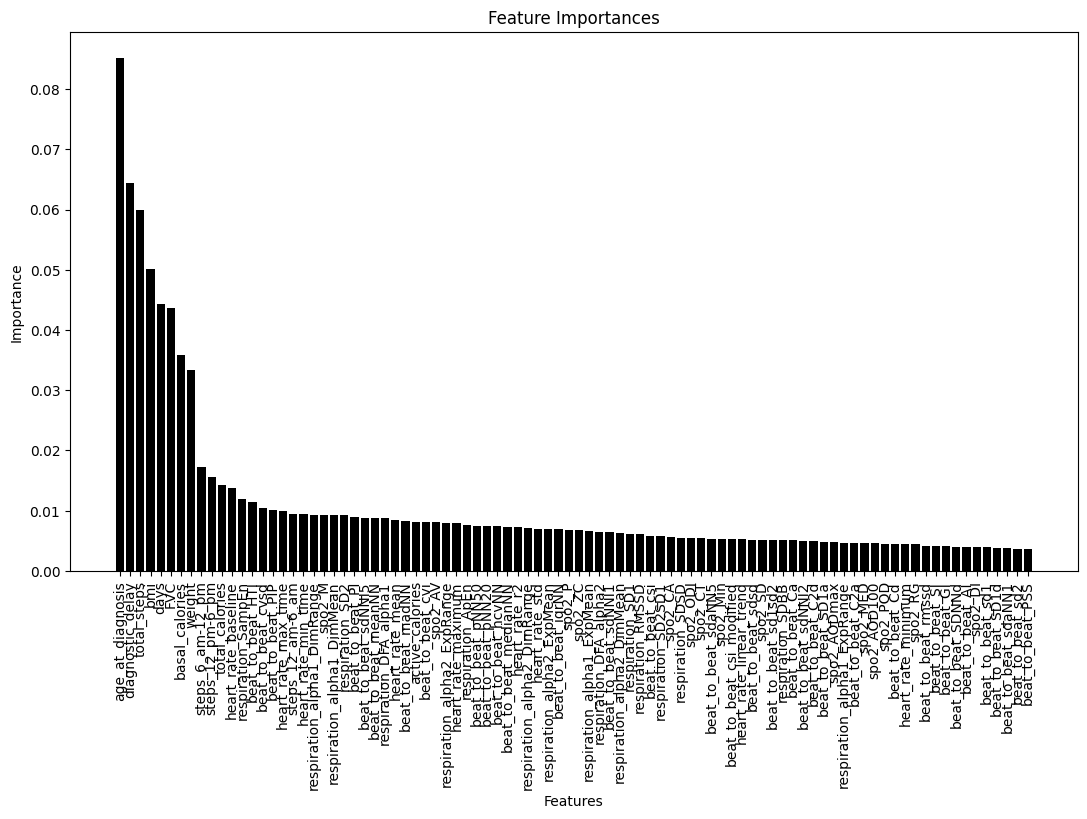

In [35]:
rf = RandomForestRegressor()
rf.fit(x1,y)
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': x1.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
ifs=importance_df['Feature'][:90]
selected_columns = list(ifs)
print(selected_columns)

plt.figure(figsize=(13,7))
plt.bar(ifs, importance_df['Importance'][:90], color='black')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

In [36]:
x=x1[['basal_calories', 'total_steps', 'age_at_diagnosis', 'diagnostic_delay', 'weight', 'steps_6_am-12_pm', 'days', 'total_calories', 'bmi', 'FVC', 'steps_12_pm-6_pm', 'respiration_SD2', 'respiration_SampEn', 'spo2_M', 'heart_rate_r2', 'beat_to_beat_meanNN', 'active_calories', 'spo2_CT', 'beat_to_beat_sdNNI5', 'respiration_ApEn', 'beat_to_beat_PI', 'beat_to_beat_pNN50', 'beat_to_beat_sdNNI1', 'respiration_DFA_alpha2', 'respiration_SDBB', 'heart_rate_mean', 'beat_to_beat_cvi', 'beat_to_beat_C2d', 'heart_rate_min_time', 'steps_12_am-6_am', 'beat_to_beat_medianNN', 'respiration_alpha1_ExpRange', 'spo2_AODmax', 'heart_rate_max_time', 'beat_to_beat_csi', 'beat_to_beat_csi_modified', 'spo2_ODI', 'respiration_alpha1_ExpMean', 'heart_rate_std', 'respiration_DFA_alpha1', 'respiration_SD2SD1', 'beat_to_beat_PIP', 'respiration_alpha2_DimMean', 'beat_to_beat_hcvNN', 'heart_rate_maximum', 'beat_to_beat_HTI', 'beat_to_beat_cvsd', 'beat_to_beat_pNN20', 'respiration_alpha2_ExpRange', 'beat_to_beat_iqrNN', 'respiration_RMSSD', 'heart_rate_linear_trend', 'spo2_ZC', 'respiration_alpha1_DimRange', 'respiration_SD1', 'spo2_AV', 'respiration_SDSD', 'heart_rate_baseline', 'respiration_alpha2_DimRange', 'respiration_alpha1_DimMean', 'spo2_RG', 'beat_to_beat_sdNNI2', 'spo2_CA', 'beat_to_beat_Cd', 'beat_to_beat_sd1', 'heart_rate_minimum', 'beat_to_beat_sd1sd2', 'spo2_AOD100', 'spo2_SD', 'beat_to_beat_C2a', 'beat_to_beat_AI', 'spo2_POD', 'beat_to_beat_sdsd', 'spo2_P', 'beat_to_beat_Ca', 'beat_to_beat_SI', 'spo2_MED', 'respiration_alpha2_ExpMean', 'beat_to_beat_madNN', 'beat_to_beat_sdaNN1', 'beat_to_beat_sd2', 'spo2_Min', 'beat_to_beat_GI', 'beat_to_beat_SDNNd', 'beat_to_beat_SD1a', 'beat_to_beat_sdaNN5', 'beat_to_beat_sdaNN2', 'beat_to_beat_sdNN', 'beat_to_beat_SD1d', 'spo2_DI']]
x


,basal_calories,total_steps,age_at_diagnosis,diagnostic_delay,weight,steps_6_am-12_pm,days,total_calories,bmi,FVC,...,beat_to_beat_sd2,spo2_Min,beat_to_beat_GI,beat_to_beat_SDNNd,beat_to_beat_SD1a,beat_to_beat_sdaNN5,beat_to_beat_sdaNN2,beat_to_beat_sdNN,beat_to_beat_SD1d,spo2_DI
47,1631.0,142.0,59.204651,5.606003,56.492016,24.0,993.0,1639.25,20.264374,70.684052,...,96.596396,77.666667,50.104065,48.149080,3.349105,67.035243,67.930166,68.379581,3.352920,3.037037
123,1766.0,3162.0,51.947746,2.174742,85.750313,1450.0,87.0,2014.25,28.163280,87.648666,...,155.996535,86.000000,50.631210,78.844276,4.851770,110.575767,109.844217,110.425893,6.203615,1.111996
194,1766.0,3685.0,51.947746,2.174742,85.750313,1482.0,266.0,2159.25,28.163280,87.648666,...,113.348764,83.666667,50.081903,56.882267,4.555116,81.289643,79.720819,80.267796,4.495861,0.824116
285,1711.0,104.0,46.739292,19.921732,63.679276,88.0,775.0,1780.25,21.261316,42.740082,...,88.830788,76.666667,50.285924,45.079304,3.195200,62.203123,62.198185,62.885733,3.121916,2.423528
408,1711.0,20.0,46.739292,19.921732,63.679276,20.0,929.0,1740.25,21.261316,42.740082,...,74.456538,78.666667,50.207117,38.060443,2.706349,52.890052,52.336524,52.718690,2.903784,1.401107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1701.0,692.0,57.801941,2.410682,67.543747,176.0,903.0,1930.25,23.366228,81.115341,...,136.052218,81.666667,49.975180,68.367044,4.069148,96.807818,95.768926,96.281310,4.089313,1.189847
996,1726.0,286.0,54.541019,-0.410122,83.416771,127.0,435.0,1746.25,27.711195,92.351006,...,137.902657,85.200000,50.037789,68.545748,4.553789,97.553350,96.921705,97.610317,4.662786,1.003881
997,1470.0,8479.0,58.426224,2.841146,49.285839,3212.0,187.0,2243.25,18.810480,73.183426,...,187.083120,87.000000,50.132964,93.932196,4.866128,130.863840,131.758645,132.365932,4.893767,1.599490
998,1666.0,1854.0,52.852211,0.742773,80.978439,719.0,285.0,1778.25,27.016291,88.652908,...,174.875477,88.000000,50.218825,88.293158,5.089349,124.145616,123.173529,123.744254,4.925622,0.962689


In [37]:
sc = MinMaxScaler()
x = sc.fit_transform(x)
sc = StandardScaler()
x = sc.fit_transform(x)

In [38]:
y

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
47,3.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,1.0,3.0,1.0
123,4.0,4.0,4.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
194,4.0,4.0,4.0,3.0,3.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0
285,4.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
408,4.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.0,4.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,4.0,4.0,4.0
996,4.0,4.0,4.0,3.0,3.0,3.0,3.0,2.0,1.0,4.0,4.0,4.0
997,3.0,3.0,2.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0
998,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0


## ***************SPLITTING INTO TRAINING AND TESTING /MODEL DEVELOPMENT**************

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size = 0.1,random_state=42)

In [40]:
x_train.shape

(1337, 90)

## MLP MODEL

In [41]:
mlp_model=Sequential()
mlp_model.add(Dense(124,activation='relu',input_shape=(90,)))
mlp_model.add(Dense(64,activation='relu'))
mlp_model.add(Dense(64,activation='relu'))
mlp_model.add(Dense(32,activation='relu'))
mlp_model.add(Dropout(0.2))
mlp_model.add(Dense(12, activation='linear'))
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 124)               11284     
                                                                 
 dense_5 (Dense)             (None, 64)                8000      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 12)                396       
                                                                 
Total params: 25,920
Trainable params: 25,920
Non-traina

In [42]:
mlp_model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])
mlp_his=mlp_model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test, y_test))
mlp_pred=mlp_model.predict(x_test)
mlp_pred=np.round((np.clip(mlp_pred,0,4))).astype(int)

Epoch 1/100
42/42 [==============================] - 3s 15ms/step - loss: 6.4782 - mean_absolute_error: 2.1800 - val_loss: 2.3055 - val_mean_absolute_error: 1.3006
Epoch 2/100
42/42 [==============================] - 0s 5ms/step - loss: 2.5048 - mean_absolute_error: 1.2850 - val_loss: 1.2942 - val_mean_absolute_error: 0.9561
Epoch 3/100
42/42 [==============================] - 0s 4ms/step - loss: 1.8151 - mean_absolute_error: 1.0859 - val_loss: 1.0608 - val_mean_absolute_error: 0.8385
Epoch 4/100
42/42 [==============================] - 0s 5ms/step - loss: 1.6046 - mean_absolute_error: 1.0215 - val_loss: 0.9773 - val_mean_absolute_error: 0.8064
Epoch 5/100
42/42 [==============================] - 0s 5ms/step - loss: 1.4248 - mean_absolute_error: 0.9515 - val_loss: 0.9019 - val_mean_absolute_error: 0.7772
Epoch 6/100
42/42 [==============================] - 0s 5ms/step - loss: 1.2743 - mean_absolute_error: 0.9032 - val_loss: 0.8288 - val_mean_absolute_error: 0.7261
Epoch 7/100
42/42 [==

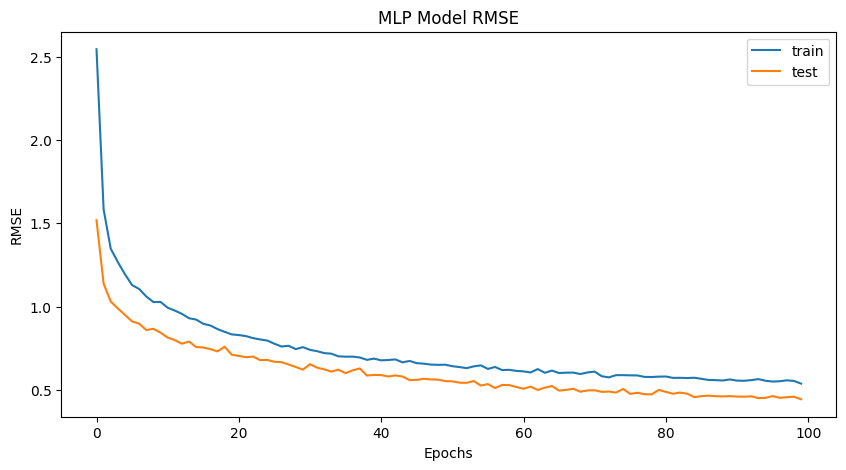

In [43]:
plt.figure(figsize=(10,5))
plt.plot(np.sqrt(mlp_his.history['loss']))
plt.plot(np.sqrt(mlp_his.history['val_loss']))
plt.legend(['train','test'])
plt.title('MLP Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epochs')
plt.show()

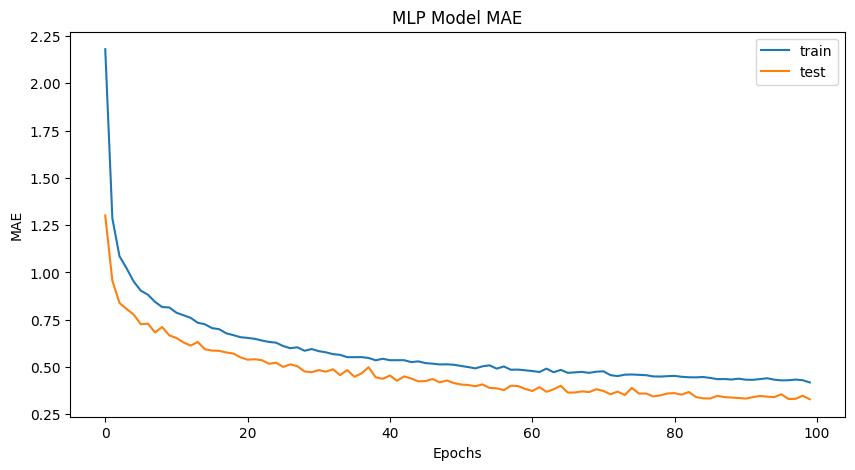

In [44]:
plt.figure(figsize=(10,5))
plt.plot(mlp_his.history['mean_absolute_error'])
plt.plot(mlp_his.history['val_mean_absolute_error'])
plt.legend(['train','test'])
plt.title('MLP Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.show()

In [45]:
print('MAE for MLP:',mean_absolute_error(mlp_pred,y_test))
print('RMSE for MLP:',np.sqrt(mean_squared_error(mlp_pred,y_test)))
print('R-squared value for MLP:',r2_score(mlp_pred,y_test))

MAE for MLP: 0.203579418344519
RMSE for MLP: 0.4658349891715578
R-squared value for MLP: 0.7420137468454507


## ANN Feed forward Algorithm

In [46]:
ff_model=Sequential()
ff_model.add(Dense(124,activation='relu',input_shape=(90,)))
ff_model.add(Dense(64,activation='relu'))
ff_model.add(Flatten())
ff_model.add(Dense(64,activation='relu'))
ff_model.add(Flatten())
ff_model.add(Dense(64,activation='relu'))
ff_model.add(Dense(32,activation='relu'))
ff_model.add(Dropout(0.2))
ff_model.add(Dense(12, activation='linear'))
ff_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 124)               11284     
                                                                 
 dense_10 (Dense)            (None, 64)                8000      
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 32)               

In [47]:
ff_model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])
ff_his=ff_model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test, y_test))
ff_pred=ff_model.predict(x_test)
ff_pred=np.round((np.clip(ff_pred,0,4))).astype(int)

Epoch 1/100
42/42 [==============================] - 8s 31ms/step - loss: 4.7165 - mean_absolute_error: 1.8105 - val_loss: 1.6756 - val_mean_absolute_error: 1.0867
Epoch 2/100
42/42 [==============================] - 0s 11ms/step - loss: 2.0993 - mean_absolute_error: 1.1765 - val_loss: 1.2035 - val_mean_absolute_error: 0.9056
Epoch 3/100
42/42 [==============================] - 0s 6ms/step - loss: 1.6352 - mean_absolute_error: 1.0367 - val_loss: 1.0232 - val_mean_absolute_error: 0.8310
Epoch 4/100
42/42 [==============================] - 1s 15ms/step - loss: 1.3815 - mean_absolute_error: 0.9446 - val_loss: 0.9142 - val_mean_absolute_error: 0.7677
Epoch 5/100
42/42 [==============================] - 0s 9ms/step - loss: 1.2253 - mean_absolute_error: 0.8873 - val_loss: 0.8200 - val_mean_absolute_error: 0.7332
Epoch 6/100
42/42 [==============================] - 0s 8ms/step - loss: 1.1413 - mean_absolute_error: 0.8549 - val_loss: 0.7388 - val_mean_absolute_error: 0.6723
Epoch 7/100
42/42 [

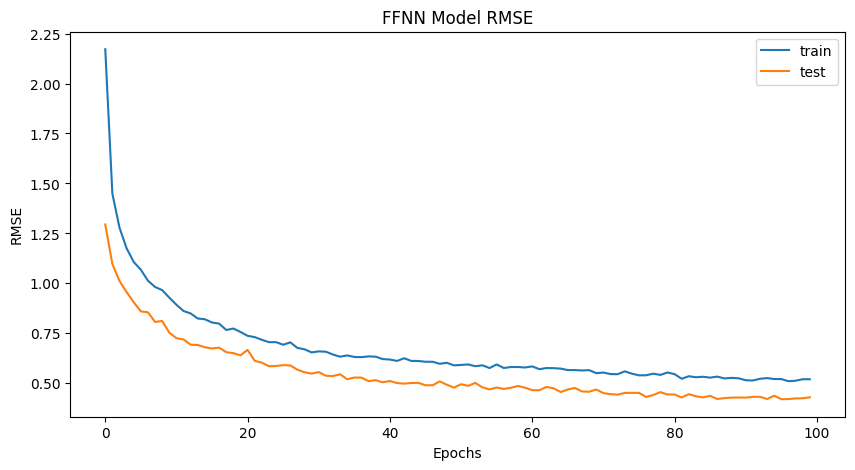

In [48]:
plt.figure(figsize=(10,5))
plt.plot(np.sqrt(ff_his.history['loss']))
plt.plot(np.sqrt(ff_his.history['val_loss']))
plt.legend(['train','test'])
plt.title('FFNN Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epochs')
plt.show()

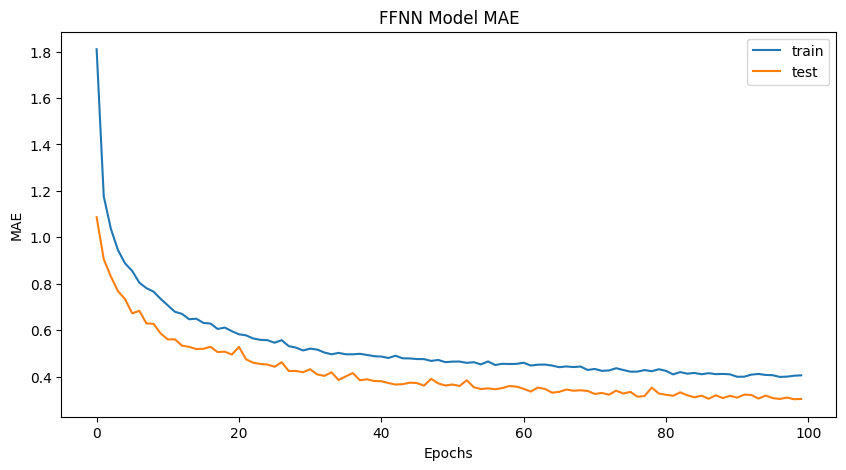

In [49]:
plt.figure(figsize=(10,5))
plt.plot(ff_his.history['mean_absolute_error'])
plt.plot(ff_his.history['val_mean_absolute_error'])
plt.legend(['train','test'])
plt.title('FFNN Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.show()

In [50]:
print('MAE for FFNN:',mean_absolute_error(ff_pred,y_test))
print('RMSE for FFNN:',np.sqrt(mean_squared_error(ff_pred,y_test)))
print('R-squared value for FFNN:',r2_score(ff_pred,y_test))

MAE for FFNN: 0.1873601789709172
RMSE for FFNN: 0.45674169438699036
R-squared value for FFNN: 0.7403058533125705


In [51]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [52]:
x_train.shape

(1337, 90, 1)

## RNN Model

In [53]:
rnn_model=Sequential()
rnn_model.add(SimpleRNN(128,input_shape=(x_train.shape[1],x_train.shape[2])))
rnn_model.add(Dense(64,activation='relu'))
rnn_model.add(Flatten())
rnn_model.add(Dense(64,activation='relu'))
rnn_model.add(Flatten())
rnn_model.add(Dense(64,activation='relu'))
rnn_model.add(Dense(32,activation='relu'))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(12, activation='linear'))

In [54]:
rnn_model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])
rnn_his=rnn_model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test, y_test))
rnn_pred=rnn_model.predict(x_test)
rnn_pred=np.round((np.clip(rnn_pred,0,4))).astype(int)

Epoch 1/100
42/42 [==============================] - 13s 113ms/step - loss: 5.1157 - mean_absolute_error: 1.8475 - val_loss: 1.6673 - val_mean_absolute_error: 1.0969
Epoch 2/100
42/42 [==============================] - 2s 39ms/step - loss: 2.2418 - mean_absolute_error: 1.1897 - val_loss: 1.3801 - val_mean_absolute_error: 1.0191
Epoch 3/100
42/42 [==============================] - 2s 46ms/step - loss: 1.9475 - mean_absolute_error: 1.1156 - val_loss: 1.3735 - val_mean_absolute_error: 1.0169
Epoch 4/100
42/42 [==============================] - 2s 43ms/step - loss: 1.7282 - mean_absolute_error: 1.0428 - val_loss: 1.0999 - val_mean_absolute_error: 0.8819
Epoch 5/100
42/42 [==============================] - 2s 44ms/step - loss: 1.7094 - mean_absolute_error: 1.0432 - val_loss: 1.1592 - val_mean_absolute_error: 0.9167
Epoch 6/100
42/42 [==============================] - 2s 49ms/step - loss: 1.6521 - mean_absolute_error: 1.0252 - val_loss: 1.0235 - val_mean_absolute_error: 0.8048
Epoch 7/100
42

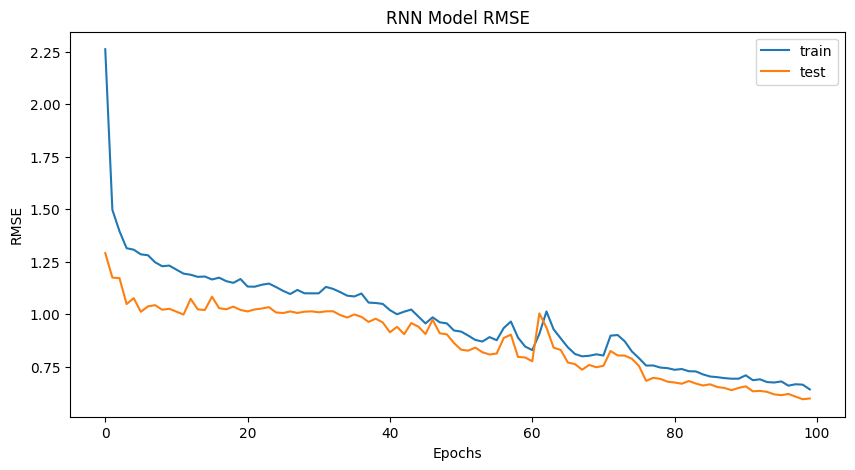

In [55]:
plt.figure(figsize=(10,5))
plt.plot(np.sqrt(rnn_his.history['loss']))
plt.plot(np.sqrt(rnn_his.history['val_loss']))
plt.legend(['train','test'])
plt.title('RNN Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epochs')
plt.show()

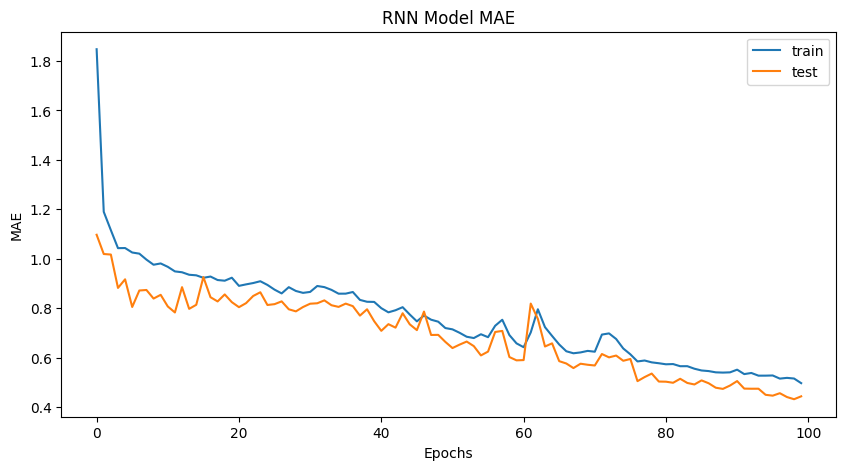

In [56]:
plt.figure(figsize=(10,5))
plt.plot(rnn_his.history['mean_absolute_error'])
plt.plot(rnn_his.history['val_mean_absolute_error'])
plt.legend(['train','test'])
plt.title('RNN Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.show()

In [57]:
print('MAE for RNN:',mean_absolute_error(rnn_pred,y_test))
print('RMSE for RNN:',np.sqrt(mean_squared_error(rnn_pred,y_test)))
print('R-squared value for RNN:',r2_score(rnn_pred,y_test))

MAE for RNN: 0.3590604026845637
RMSE for RNN: 0.6433274796594742
R-squared value for RNN: 0.42795854879242273


## LSTM Model

In [58]:
lstm_model=Sequential()
lstm_model.add(LSTM(128,input_shape=(x_train.shape[1],x_train.shape[2])))
lstm_model.add(Dense(64,activation='relu'))
lstm_model.add(Flatten())
lstm_model.add(Dense(64,activation='relu'))
lstm_model.add(Flatten())
lstm_model.add(Dense(64,activation='relu'))
lstm_model.add(Dense(32,activation='relu'))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(12, activation='linear'))

In [59]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])
lstm_his=lstm_model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test, y_test))
lstm_pred=lstm_model.predict(x_test)
lstm_pred=np.round((np.clip(lstm_pred,0,4))).astype(int)

Epoch 1/100
42/42 [==============================] - 50s 315ms/step - loss: 6.2039 - mean_absolute_error: 2.1105 - val_loss: 2.2010 - val_mean_absolute_error: 1.2883
Epoch 2/100
42/42 [==============================] - 5s 120ms/step - loss: 2.3655 - mean_absolute_error: 1.2293 - val_loss: 1.3107 - val_mean_absolute_error: 0.9919
Epoch 3/100
42/42 [==============================] - 5s 122ms/step - loss: 1.9831 - mean_absolute_error: 1.1143 - val_loss: 1.2112 - val_mean_absolute_error: 0.9363
Epoch 4/100
42/42 [==============================] - 5s 117ms/step - loss: 1.8623 - mean_absolute_error: 1.0818 - val_loss: 1.2596 - val_mean_absolute_error: 0.9649
Epoch 5/100
42/42 [==============================] - 4s 100ms/step - loss: 1.7504 - mean_absolute_error: 1.0449 - val_loss: 1.1627 - val_mean_absolute_error: 0.9070
Epoch 6/100
42/42 [==============================] - 4s 102ms/step - loss: 1.6880 - mean_absolute_error: 1.0295 - val_loss: 1.1585 - val_mean_absolute_error: 0.9112
Epoch 7/1

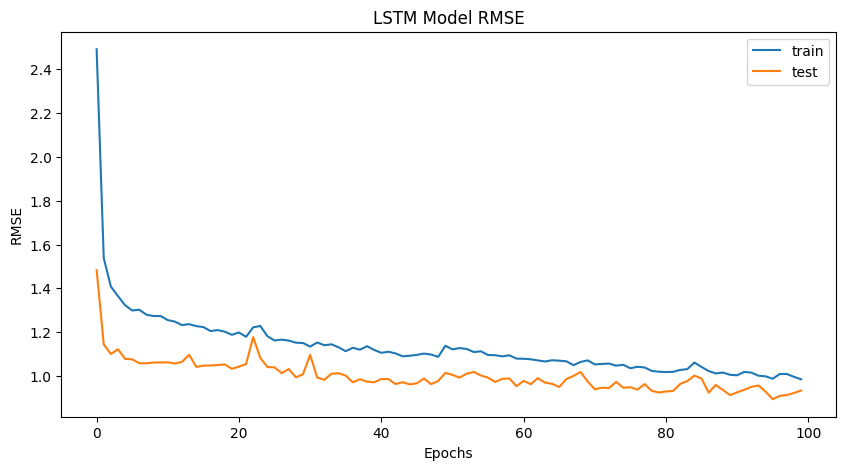

In [60]:
plt.figure(figsize=(10,5))
plt.plot(np.sqrt(lstm_his.history['loss']))
plt.plot(np.sqrt(lstm_his.history['val_loss']))
plt.legend(['train','test'])
plt.title('LSTM Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epochs')
plt.show()

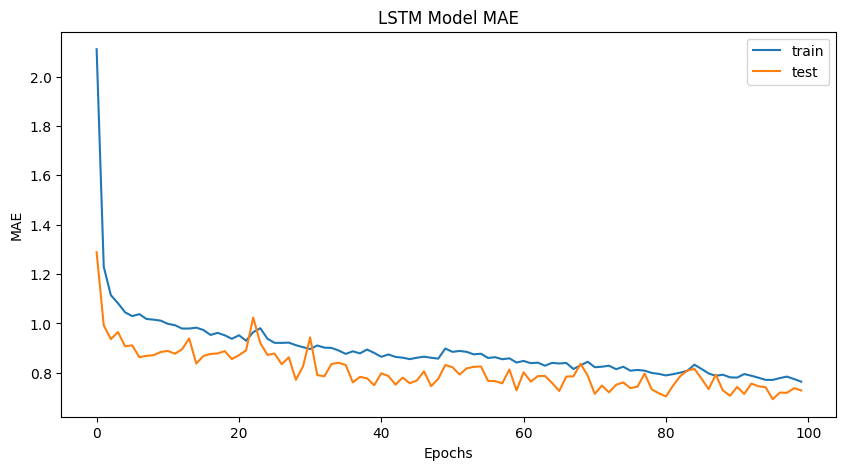

In [61]:
plt.figure(figsize=(10,5))
plt.plot(lstm_his.history['mean_absolute_error'])
plt.plot(lstm_his.history['val_mean_absolute_error'])
plt.legend(['train','test'])
plt.title('LSTM Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.show()

In [62]:
print('MAE for LSTM:',mean_absolute_error(lstm_pred,y_test))
print('RMSE for LSTM:',np.sqrt(mean_squared_error(lstm_pred,y_test)))
print('R-squared value for LSTM:',r2_score(lstm_pred,y_test))

MAE for LSTM: 0.6890380313199106
RMSE for LSTM: 0.9773726365586015
R-squared value for LSTM: -1.9268348038210596


In [63]:
model_names=['MLP','FFNN','RNN','LSTM']
mae_values=[mean_absolute_error(mlp_pred,y_test),mean_absolute_error(ff_pred,y_test),mean_absolute_error(rnn_pred,y_test),mean_absolute_error(lstm_pred,y_test)]
rmse_values=[np.sqrt(mean_squared_error(mlp_pred,y_test)),np.sqrt(mean_squared_error(ff_pred,y_test)),np.sqrt(mean_squared_error(rnn_pred,y_test)),np.sqrt(mean_squared_error(lstm_pred,y_test))]
r2_values=[r2_score(mlp_pred,y_test),r2_score(ff_pred,y_test),r2_score(rnn_pred,y_test),r2_score(lstm_pred,y_test)]
model_scores=pd.DataFrame()
model_scores['Model']=model_names
model_scores['MAE']=mae_values
model_scores['RMSE']=rmse_values
model_scores['R2 score']=r2_values
model_scores


,Model,MAE,RMSE,R2 score
0,MLP,0.203579,0.465835,0.742014
1,FFNN,0.187360,0.456742,0.740306
2,RNN,0.359060,0.643327,0.427959
3,LSTM,0.689038,0.977373,-1.926835
